# EDA para Modelo de Recomendacion

### A partir de una dataset desanidada y trabajada, originada del merge entre los datasets 'movies_dataset' y 'credits' originales, se realiza una exploración y preparación del dataset para luego ser aplicado en el Modelo de Recomendación 

Importe de librerías y carga de datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


### Se revisan las distintas columnas disponibles

In [2]:
# Se carga el dataset original "movies_dataset.csv"
eda = pd.read_csv("../Data/limpio1.csv")
eda.isna().sum()

budget                            0
id                                0
original_language                11
overview                        941
popularity                        0
release_date                      0
revenue                           0
runtime                         246
status                           80
tagline                       25026
title                             0
vote_average                      0
vote_count                        0
return                            0
release_year                      0
release_day                       0
genres_ids                        0
genres_names                      0
production_companies_id           0
production_companies_names        0
production_countries_iso          0
production_countries_names        0
spoken_languages_iso              0
spoken_languages_name             0
belongs_to_collection_id      40954
belongs_to_collection_name    40954
cast_names                        0
director_name               

### Primeramente, borramos columnas innecesarias

Se Eliminan las siguientes columnas por su irrelevancia para el modelo:
<ul>
<li>-budget
<li>-oiginal_language
<li>-release_date
<li>-revenue
<li>-runtime
<li>-vote_count
<li>-return
<li>-release_year
<li>-release_day
<li>-genres_id (queda genre_name)
<li>-production_company_id (queda production_company_name)
<li>-production_country_name (queda production_company_iso)
<li>-spoken_language_name (queda spoken_language_iso)
<li>-belongs_to_collection_name (queda belongs_to_collection_id)
<li>-tagline (muchos vacíos y poca información)

</ul>


### Belongs_to_collections_id, a pesar de tener 40.954 registros vacíos, se mantiene para su uso en el modelo de recomendacion

In [3]:
columnas_eliminar = ['budget', 
                    'original_language', 
                    'release_date', 'revenue', 
                    'runtime', 'vote_count',
                    'return',
                    'release_date',
                    'release_year',
                    'release_day',
                    'genres_ids',
                    'tagline',
                    'production_companies_id',
                    'production_countries_names',
                    'spoken_languages_name',
                    'belongs_to_collection_name']
eda.drop(columns=columnas_eliminar, inplace=True)

### Quedamos con las siguientes columnas y sus respectivos datos vacios


In [4]:
eda.isna().sum()

id                                0
overview                        941
popularity                        0
status                           80
title                             0
vote_average                      0
genres_names                      0
production_companies_names        0
production_countries_iso          0
spoken_languages_iso              0
belongs_to_collection_id      40954
cast_names                        0
director_name                   835
dtype: int64

### Eliminación de datos duplicados

In [5]:
print(eda.duplicated().sum())
print(eda.shape)

92
(45451, 13)


Se eliminan los 92 duplicados

In [6]:
eda = eda.drop_duplicates()
eda.shape

(45359, 13)

## Se analiza la columna 'status'

In [7]:
eda['status'].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

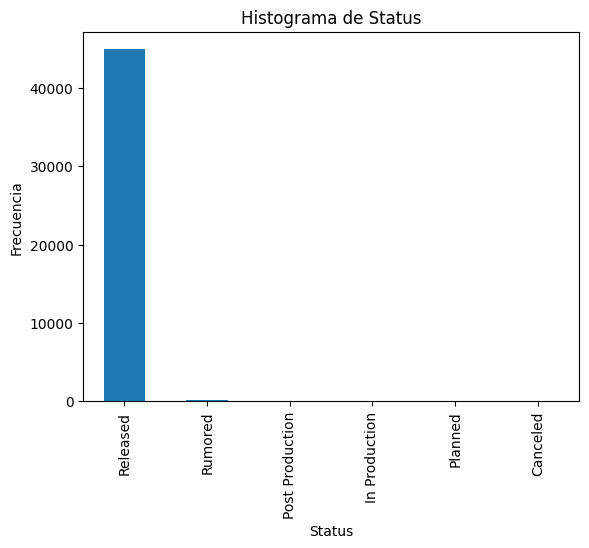

In [8]:
# Se grafican las distintas categorías en un histograma
frecuencia = eda['status'].value_counts()
frecuencia.plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Frecuencia')
plt.title('Histograma de Status')
plt.show()

La única categoría que vamos a utilizar en el modelo será 'Released', dado que las aún no estrenadas no tendrán votación ni puntaje.
Por lo que eliminamos las entradas que películas que no estén estrenadas, y se elimina la columna 'status

In [9]:
eda=eda.loc[eda['status']=='Released']
eda =eda.drop(columns='status')

In [10]:
eda


,id,overview,popularity,title,vote_average,genres_names,production_companies_names,production_countries_iso,spoken_languages_iso,belongs_to_collection_id,cast_names,director_name
0,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,Toy Story,7.7,"['Animation', 'Comedy', 'Family']",['Pixar Animation Studios'],['US'],['en'],10194.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter
1,8844,When siblings Judy and Peter discover an encha...,17.015539,Jumanji,6.9,"['Adventure', 'Fantasy', 'Family']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['US'],"['en', 'fr']",NaN,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston
2,15602,A family wedding reignites the ancient feud be...,11.712900,Grumpier Old Men,6.5,"['Romance', 'Comedy']","['Warner Bros.', 'Lancaster Gate']",['US'],['en'],119050.0,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch
3,31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,Waiting to Exhale,6.1,"['Comedy', 'Drama', 'Romance']",['Twentieth Century Fox Film Corporation'],['US'],['en'],NaN,"['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker
4,11862,Just when George Banks has recovered from his ...,8.387519,Father of the Bride Part II,5.7,['Comedy'],"['Sandollar Productions', 'Touchstone Pictures']",['US'],['en'],96871.0,"['Steve Martin', 'Diane Keaton', 'Martin Short...",Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...
45446,30840,"Yet another version of the classic epic, with ...",5.683753,Robin Hood,5.7,"['Drama', 'Action', 'Romance']","['Westdeutscher Rundfunk (WDR)', 'Working Titl...","['CA', 'DE', 'GB', 'US']",['en'],NaN,"['Patrick Bergin', 'Uma Thurman', 'David Morri...",John Irvin
45447,111109,An artist struggles to finish his work while a...,0.178241,Century of Birthing,9.0,['Drama'],['Sine Olivia'],['PH'],['tl'],NaN,"['Angel Aquino', 'Perry Dizon', 'Hazel Orencio...",Lav Diaz
45448,67758,"When one of her hits goes wrong, a professiona...",0.903007,Betrayal,3.8,"['Action', 'Drama', 'Thriller']",['American World Pictures'],['US'],['en'],NaN,"['Erika Eleniak', 'Adam Baldwin', 'Julie du Pa...",Mark L. Lester
45449,227506,"In a small town live two brothers, one a minis...",0.003503,Satan Triumphant,0.0,[],['Yermoliev'],['RU'],[],NaN,"['Iwan Mosschuchin', 'Nathalie Lissenko', 'Pav...",Yakov Protazanov


### Como el modelo se basará principalmente en similitud de conceptos en votaciones, overview, y similitudes en actores y directores se decide eliminar las filass que tengan 'overview' y 'directors_name' vacío


In [11]:
eda = eda.dropna(subset=['overview', 'director_name'])
eda.isna().sum()

id                                0
overview                          0
popularity                        0
title                             0
vote_average                      0
genres_names                      0
production_companies_names        0
production_countries_iso          0
spoken_languages_iso              0
belongs_to_collection_id      38896
cast_names                        0
director_name                     0
dtype: int64

### Analizamos las 2 columnas numericas 'popularity' y 'score_average' orbservando que no hay correlación importante pero si outliers

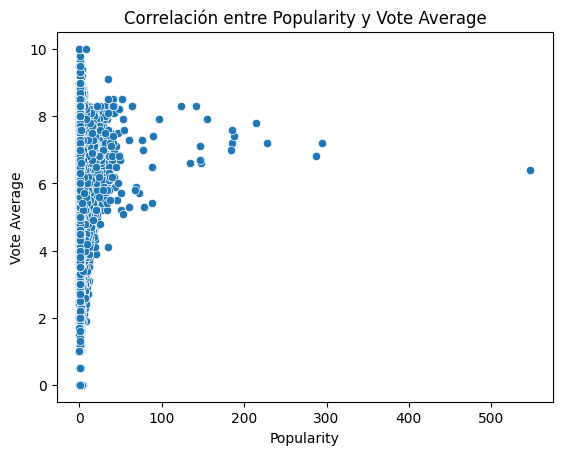

              popularity  vote_average
popularity       1.00000       0.15181
vote_average     0.15181       1.00000


In [12]:
sns.scatterplot(data=eda, x='popularity', y='vote_average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.title('Correlación entre Popularity y Vote Average')
plt.show()

correlacion = eda[['popularity', 'vote_average']].corr()
print(correlacion)

### Se Revisan los Outliers de 'popularity' pero se deciden dejar por ser películas de alta demanda para el modelo

In [13]:
filtro = eda[eda['popularity']>200]
filtro

,id,overview,popularity,title,vote_average,genres_names,production_companies_names,production_countries_iso,spoken_languages_iso,belongs_to_collection_id,cast_names,director_name
24473,177572,The special bond that develops between plus-si...,213.849907,Big Hero 6,7.8,"['Adventure', 'Family', 'Animation', 'Action',...","['Walt Disney Pictures', 'Walt Disney Animatio...",['US'],['en'],NaN,"['Scott Adsit', 'Ryan Potter', 'Daniel Henney'...",Chris Williams
30731,211672,"Minions Stuart, Kevin and Bob are recruited by...",547.488298,Minions,6.4,"['Family', 'Animation', 'Adventure', 'Comedy']","['Universal Pictures', 'Illumination Entertain...",['US'],['en'],86066.0,"['Sandra Bullock', 'Jon Hamm', 'Michael Keaton...",Kyle Balda
33383,297762,An Amazon princess comes to the world of Man t...,294.337037,Wonder Woman,7.2,"['Action', 'Adventure', 'Fantasy']","['Dune Entertainment', 'Atlas Entertainment', ...",['US'],"['de', 'en']",468552.0,"['Gal Gadot', 'Chris Pine', 'Robin Wright', 'D...",Patty Jenkins
42224,321612,A live-action adaptation of Disney's version o...,287.253654,Beauty and the Beast,6.8,"['Family', 'Fantasy', 'Romance']","['Walt Disney Pictures', 'Mandeville Films']","['GB', 'US']",['en'],NaN,"['Emma Watson', 'Dan Stevens', 'Luke Evans', '...",Bill Condon
43639,339403,After being coerced into working for a crime b...,228.032744,Baby Driver,7.2,"['Action', 'Crime']","['Big Talk Productions', 'TriStar Pictures', '...","['GB', 'US']",['en'],NaN,"['Ansel Elgort', 'Lily James', 'Kevin Spacey',...",Edgar Wright


## Nube de palabrasp más repetidas en columna 'overview'

Para explorar un poco la columna 'overview', se crea una nube de palabras con la libreria wordcloud

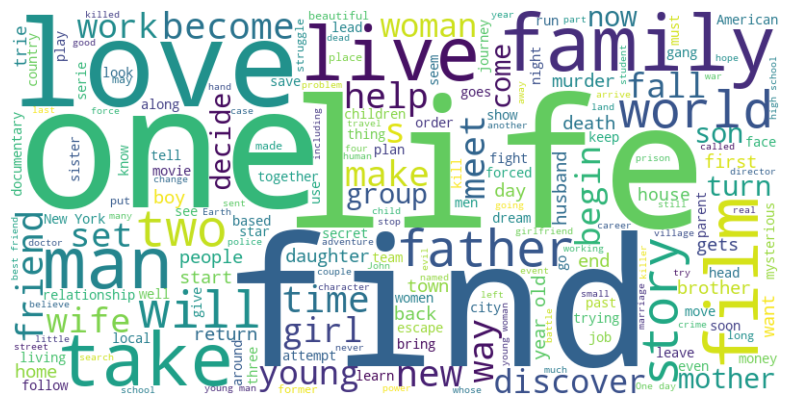

In [14]:
text = ' '.join(eda['overview'].astype(str))

# Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Observamos que las palabras más comunes son life, find, one, family, live, take, man, world, etc.
Notar que film aparece mucho pero es debido a la estructura del overview: "this film is about...." o "in this film...."

## Nube de palabras en columna 'title'

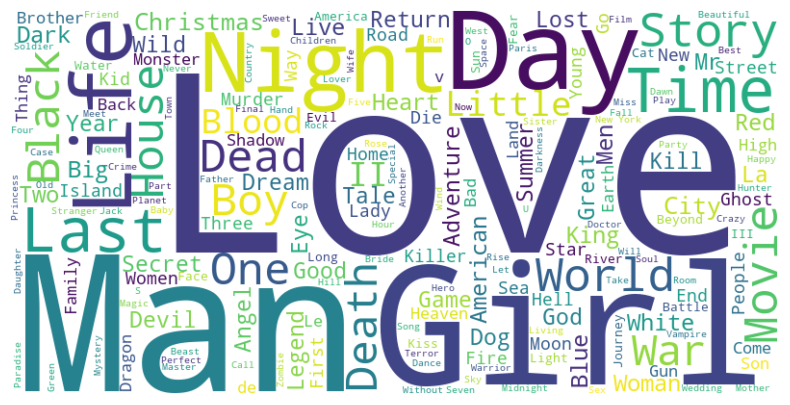

In [15]:
text = ' '.join(eda['title'].astype(str))

# Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

La palabra American aparece mucho debido al origen de la vasta mayoría de las películas.
Notamos que 'man' y 'girl' aparecen notablemente más que 'woman', desbalanceadamente

### Analisis de la distribución en columna 'popularity'

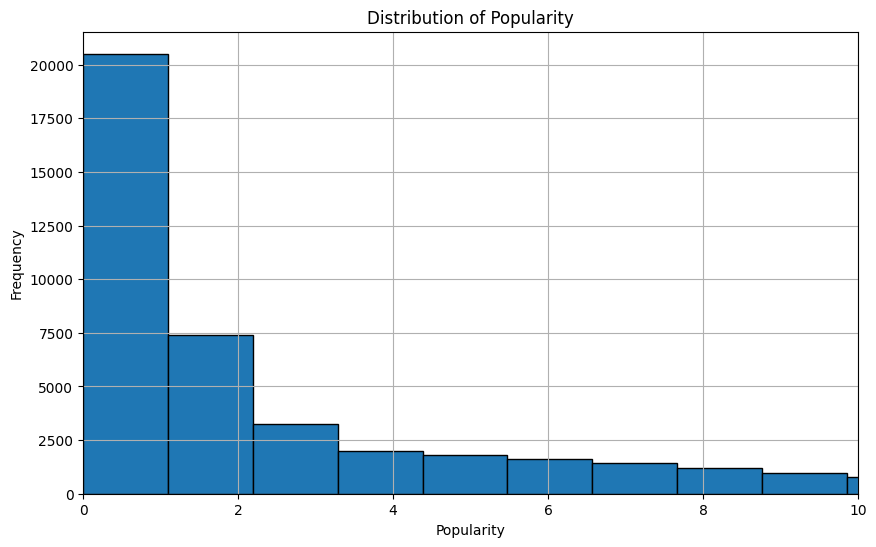

In [16]:
popularity_data = eda['popularity']

# Crea el histograma
plt.figure(figsize=(10, 6))  # Tamaño opcional para ajustar el gráfico
plt.hist(popularity_data, bins=500, edgecolor='black')  # Ajusta el número de bins según tu preferencia
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity')
plt.grid(True)
plt.xlim(0,10)
plt.show()

### Análisis de la Distribución de los valores de 'score_average'

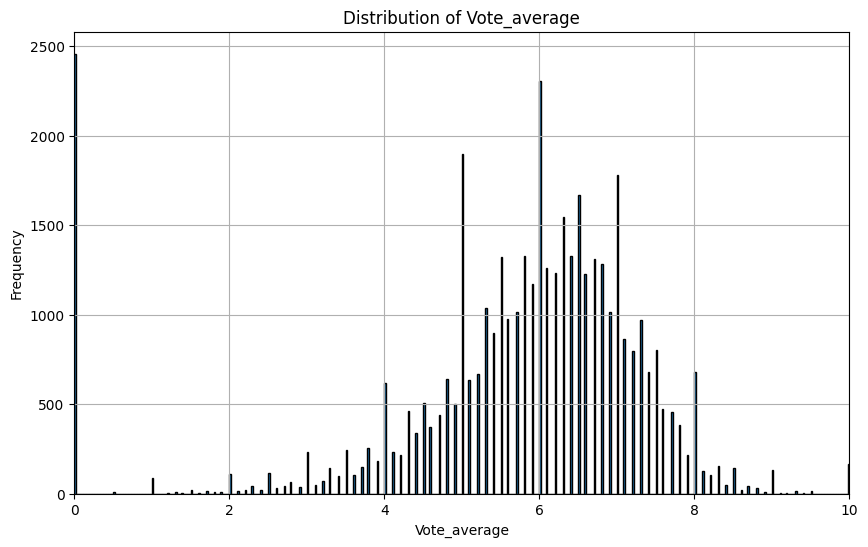

In [17]:
popularity_data = eda['vote_average']

# Crea el histograma
plt.figure(figsize=(10, 6))  # Tamaño opcional para ajustar el gráfico
plt.hist(popularity_data, bins=500, edgecolor='black')  # Ajusta el número de bins según tu preferencia
plt.xlabel('Vote_average')
plt.ylabel('Frequency')
plt.title('Distribution of Vote_average')
plt.grid(True)
plt.xlim(0,10)
plt.show()

Notamos que hay una tendencia de campana, con algunos outliers en cantidad. Tambien notamos que existe una enorme masa de valores ceros (que representarían que no hay votación), pero se deciden mantener aquellas peliculas y no interferir con ese valor

In [18]:
eda.head()

,id,overview,popularity,title,vote_average,genres_names,production_companies_names,production_countries_iso,spoken_languages_iso,belongs_to_collection_id,cast_names,director_name
0,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,Toy Story,7.7,"['Animation', 'Comedy', 'Family']",['Pixar Animation Studios'],['US'],['en'],10194.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter
1,8844,When siblings Judy and Peter discover an encha...,17.015539,Jumanji,6.9,"['Adventure', 'Fantasy', 'Family']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['US'],"['en', 'fr']",NaN,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston
2,15602,A family wedding reignites the ancient feud be...,11.712900,Grumpier Old Men,6.5,"['Romance', 'Comedy']","['Warner Bros.', 'Lancaster Gate']",['US'],['en'],119050.0,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch
3,31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,Waiting to Exhale,6.1,"['Comedy', 'Drama', 'Romance']",['Twentieth Century Fox Film Corporation'],['US'],['en'],NaN,"['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker
4,11862,Just when George Banks has recovered from his ...,8.387519,Father of the Bride Part II,5.7,['Comedy'],"['Sandollar Productions', 'Touchstone Pictures']",['US'],['en'],96871.0,"['Steve Martin', 'Diane Keaton', 'Martin Short...",Charles Shyer


### Nota: Si bien algunas columnas no serán utilizadas en el modelo básico, como lo son por ejemplo 'spoken_languages_iso' y 'production_companies', se esperan poder utilizar en versiones más complejas, por lo que se deciden mantener en el dataset 

## Finalmente, quedamos con las siguientes columnas para su posible uso en el Modelo de Recomendación:
<ul>
<li>id (int: identificador unico de la pelicula)
<li> overview (str: resumen de la trama)
<li> popularity (float: popularidad de la pelicula)
<li> title (str: titulo de la pelicula)
<li> vote_average (float: promedio de votacion)
<li> genres_names (lista de str: generos)
<li> production_companies_name (lista de str: compañias de produccion)
<li> productiom_countries_iso (lista de str: paises de origen)
<li> spoken_languages_iso (lista de str: idiomas)
<li> belongs_to_collection_id (int: id de la collección)
<li> cast_names (lista de str: actores/actrices de la pelicula)
<li> director_name (str: nombre del director/a)

In [20]:
# finalmente, se guarda el la data lista
eda.to_csv('limpio2.csv', index=False)